<a href="https://colab.research.google.com/github/shahtisha/IPCV/blob/main/IPCV_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import cv2
import keras
import matplotlib.pyplot as plt
import matplotlib.image as img
from google.colab.patches import cv2_imshow

In [44]:
from keras.datasets import mnist

In [45]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
index = np.random.randint(0, 10000)
image = x_train[index]

(28, 28)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
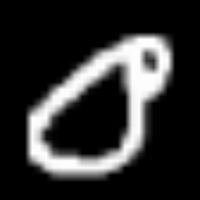

In [49]:
def greyscale(image):
  h,w = image.shape
  new_img = np.zeros((h, w))
  for i in range(h):
    for j in range(w):
      new_pixel = np.sum(image[i, j])
      new_img[i, j] = new_pixel
  return new_img

print(image.shape)
greyscaled = greyscale(image)
cv2_imshow(greyscaled)
cv2.resize(image,(200, 200))

cropping


(28, 28)


array([[204, 204, 204, ...,   0,   0,   0],
       [204, 204, 204, ...,   0,   0,   0],
       [204, 204, 204, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
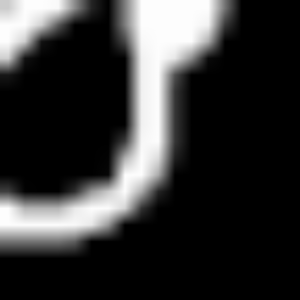

In [50]:
def crop_image(image, x, y):
  h, w = image.shape
  cropped = image[y:y+h, x:x+w]
  return cropped

print(image.shape)
cropped_img = crop_image(image, 10, 10)
cv2_imshow(cropped_img)
cv2.resize(cropped_img,(300, 300))

arithmetic operations


In [ ]:
def add(img1, img2):
  assert img1.shape == img2.shape #both imgs must have same size
  h, w, c = img1.shape
  addedimg = img1.copy()
  for x in range(h):
    for y in range(w):
      for z in range(c):
        addedimg[x, y, z] = min(int(img1[x, y, z]) + int(img2[x, y, z]), 255)
  return addedimg

def sub(img1, img2):
  assert img1.shape == img2.shape #both imgs must have same size
  h, w, c = img1.shape
  subimg = img1.copy()
  for x in range(h):
    for y in range(w):
      for z in range(c):
        subimg[x, y, z] = min(int(img1[x, y, z]) - int(img2[x, y, z]), 255)
  return subimg

def multiply(img1, img2):
  assert img1.shape == img2.shape #both imgs must have same size
  h, w, c = img1.shape
  multiimg = img1.copy()
  for x in range(h):
    for y in range(w):
      for z in range(c):
        multiimg[x, y, z] = min(int(img1[x, y, z]) * int(img2[x, y, z]), 255)
  return multiimg

def divide(img1, img2):
  assert img1.shape == img2.shape #both imgs must have same size
  h, w, c = img1.shape
  divimg = img1.copy()
  for x in range(h):
    for y in range(w):
      for z in range(c):
        if int(img2[x, y, z]) != 0:
          divimg[x, y, z] = min(int(img1[x, y, z]) / int(img2[x, y, z]), 255)
        else:
          divimg[x, y, z] = 255
  return divimg

def blend(image1,image2,alpha):
    return(alpha*image1 + (1-alpha)*image2)

index = np.random.randint(0, 10000, 2)
a = x_train[index[0]]
b = x_train[index[1]]
cv2_imshow(add(a, b))

logical operations


In [53]:
def LAnd(image1, image2):
  result = image1 & image2
  return result

def LOr(image1, image2):
  result = image1 | image2
  return result

def LNot(image1):
  og_shape = image1.shape
  img = image1.flatten()
  max_val = img.max()
  result = []
  for i in range(len(img)):
    result.append(max_val - img[i])
  return np.array(result).reshape(og_shape)

def LXor(image1, image2):
  result = image1 ^ image2
  return result

image1 = x_test[index[0]]
image2 = x_test[index[1]]
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(LAnd(image1, image2))
cv2_imshow(LOr(image1, image2))
cv2_imshow(LXor(image1, image2))
cv2_imshow(LNot(image1))

leftshift, rightshift


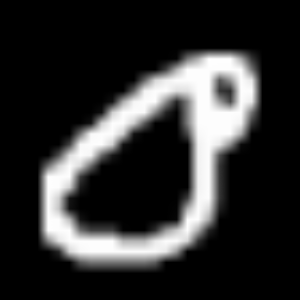

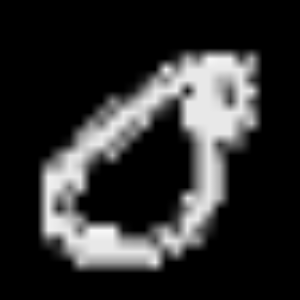

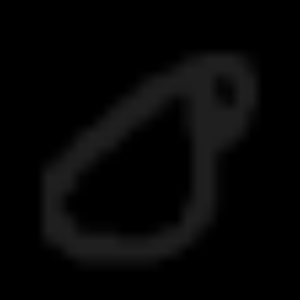

In [78]:
def bls(image,n):
    return np.left_shift(image,n)
def brs(image,n):
    return np.right_shift(image,n)

def zoom(img):
  return cv2.resize(img,(300, 300))

cv2_imshow(zoom(image))
cv2_imshow(zoom(bls(image,3)))
cv2_imshow(zoom(brs(image,3)))


thresholding


In [73]:
def thresholding(image, t):
  og = image.shape
  temp = image.flatten()
  new = []
  for pixel in temp:
    if(pixel >= t):
      new.append(255)
    else:
      new.append(0)
  return np.array(new).reshape(og)

threshold_image = thresholding(image, 150)
cv2_imshow(threshold_image)

def negative(image):
  temp = []
  for i in range(len(image)):
    row = []
    for j in range(len(image[i])):
      row.append(255 - image[i][j])
    temp.append(row)
  return temp

graylevel slicing


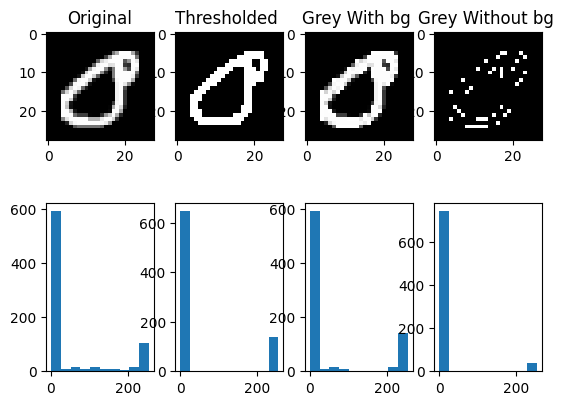

In [74]:
def greylevelslicing_withbg(image, a, b):
  og_shape = image.shape
  temp_img = image.flatten()
  new_img = []
  for i in temp_img:
    if(a<=i<=b):
      new_img.append(255)
    else:
      new_img.append(i)
  return np.array(new_img).reshape(og_shape)

def greylevelslicing_withoutbg(image, a, b):
  og_shape = image.shape
  temp_img = image.flatten()
  new_img = []
  for i in temp_img:
    if(a<=i<=b):
      new_img.append(255)
    else:
      new_img.append(0)
  return np.array(new_img).reshape(og_shape)

grey_wbg = greylevelslicing_withbg(image, 100, 200)
grey_wobg = greylevelslicing_withoutbg(image, 100, 200)

figure, axis = plt.subplots(2, 4)
axis[0,0].imshow(image, cmap='gray')
axis[0,0].set_title('Original')
axis[0,1].imshow(threshold_image, cmap='gray')
axis[0,1].set_title('Thresholded ')
axis[0,2].imshow(grey_wbg, cmap='gray')
axis[0,2].set_title('Grey With bg ')
axis[0,3].imshow(grey_wobg, cmap='gray')
axis[0,3].set_title('Grey Without bg ')

axis[1,0].hist(x=image.flatten())
axis[1,1].hist(x=threshold_image.flatten())
axis[1,2].hist(x=grey_wbg.flatten())
axis[1,3].hist(x=grey_wobg.flatten())
plt.show()

def plot_grayscale_histogram(image):
    hist, bins = np.histogram(image.ravel(), bins=256, range=(0, 256))

    plt.figure(figsize=(8, 6))
    plt.title("Grayscale Image Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.bar(bins[:-1], hist, width=1, color='gray')
    plt.show()

contrast_stretching


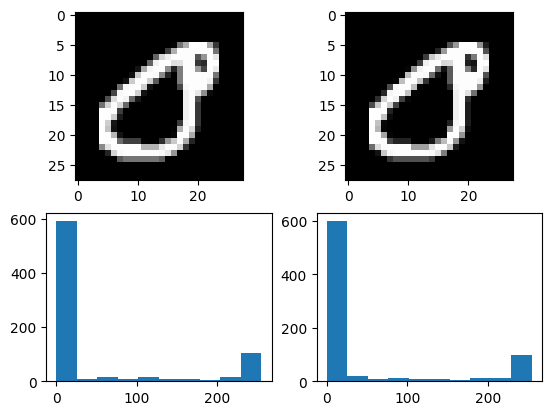

In [80]:
def contrast(image, s1, s2, r1, r2):
  og = image.shape
  temp = image.flatten()
  new = []
  alpha = s1/r1
  beta = (s2 - s1)/(r2 - r1)
  gamma = (255 - s2)/(255 - r2)
  for i in temp:
    if(i < r1):
      new.append(alpha * i)
    elif(i >= r1 and i < r2):
      new.append(beta * (i-r1) + s1)
    else:
      new.append(gamma * (i-r2) + s2)
  return np.array(new).reshape(og)
contrasted = contrast(image, 0, 60, 10, 100)

figure, axis = plt.subplots(2,2)
axis[0,0].imshow(image, cmap='gray')
axis[0,1].imshow(contrasted, cmap='gray')
axis[1,0].hist(image.flatten())
axis[1,1].hist(contrasted.flatten())
plt.show()

power transform


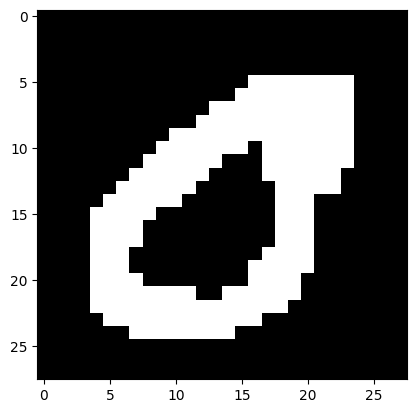

In [82]:
import math
def Power(image, c, gamma):
  og_shape = image.shape
  temp_img = image.flatten()
  new=[]
  for i in temp_img:
    new_value = c * math.pow(i, gamma)
    new.append(min(round(new_value), 255))
  return np.array(new).reshape(og_shape)

Power_img = Power(image, 3, 8)

plt.imshow(Power_img, cmap='gray')

log transform

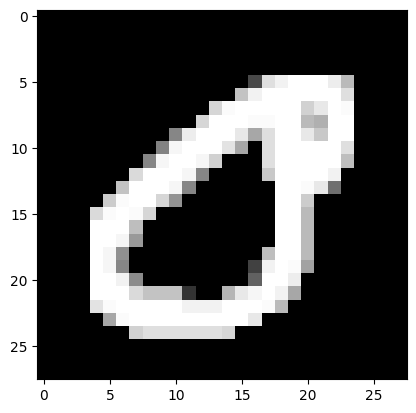

In [83]:
def Log(image, c):
  og_shape = image.shape
  temp_img = image.flatten()
  new = []
  for i in temp_img:
    new.append(round(c*np.log(1+i)))
  return np.array(new).reshape(og_shape)

plt.imshow(Log(image, 10),cmap='gray')

histogram equalization


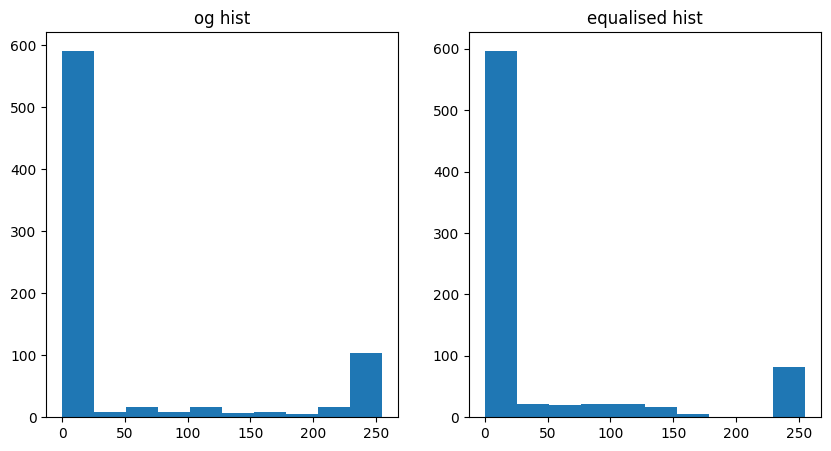

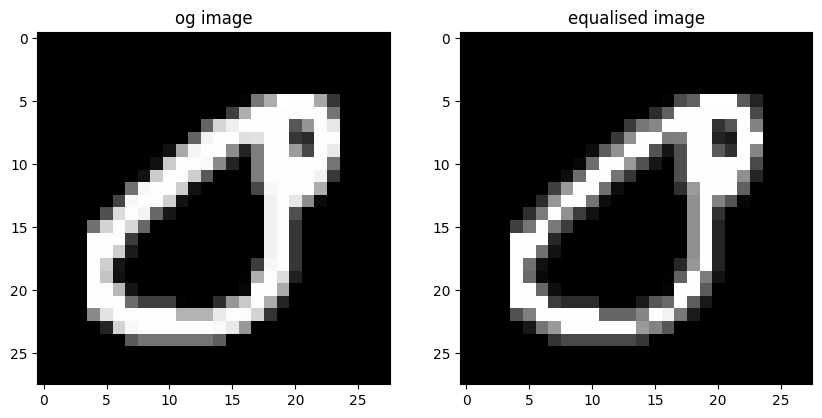

In [89]:
def hist_eq(image):
  hist, bins = np.histogram(image.flatten(), bins = 256)
  cdf = hist.cumsum()
  normalised_cdf = (cdf - cdf.min())*255 / (cdf.max() - cdf.min())
  new = np.interp(image.flatten(), bins[:-1], normalised_cdf)
  return new.reshape(image.shape)

res = hist_eq(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("og hist")
plt.hist(image.flatten())
plt.subplot(1, 2, 2)
plt.title("equalised hist")
plt.hist(res.flatten())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("og image")
plt.imshow(image, cmap = "gray")
plt.subplot(1, 2, 2)
plt.title("equalised image")
plt.imshow(res , cmap = "gray")

plt.show()

histogram stretching

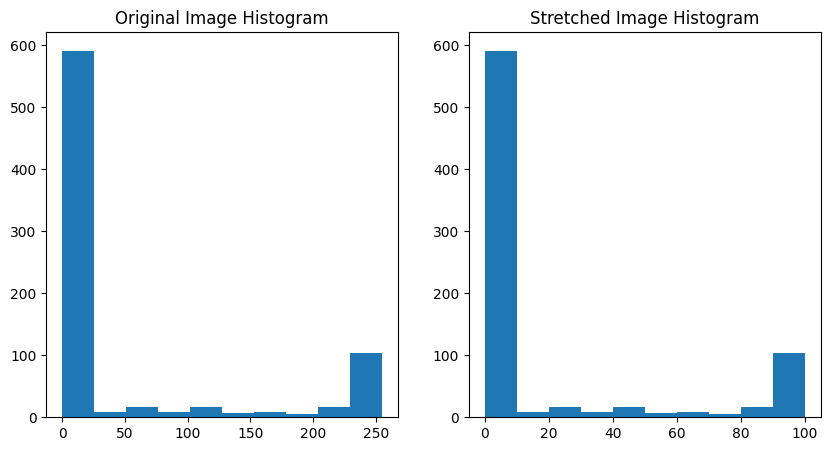

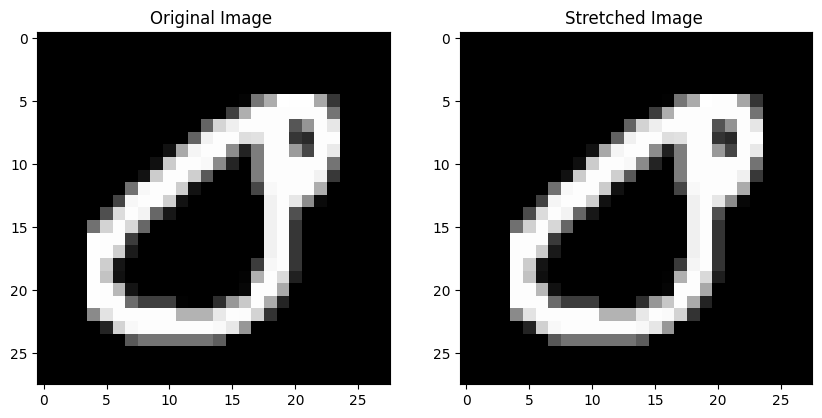

In [95]:
def hist_stretch(image, rmin, rmax):
  min_pixel = np.min(image)
  max_pixel = np.max(image)
  new = ((rmax - rmin) / (max_pixel - min_pixel)) * (image - min_pixel) + rmin
  new = np.clip(new, 0, 255)
  return new.astype(np.uint8)

res = hist_stretch(image, 0, 100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten())
plt.title('Original Image Histogram')
plt.subplot(1, 2, 2)
plt.hist(res.flatten())
plt.title('Stretched Image Histogram')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image ')
plt.subplot(1, 2, 2)
plt.imshow(res, cmap = 'gray')
plt.title('Stretched Image ')

plt.show()

mean, median, high pass, high boost

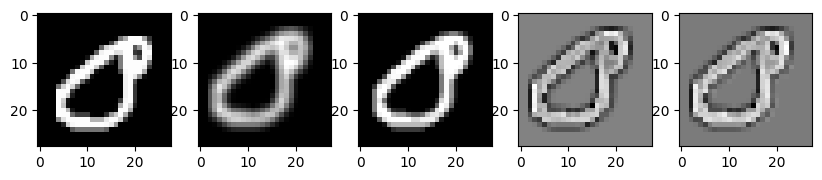

In [100]:
def apply(image, mask):
  row, col = image.shape
  h, w = mask.shape
  img = np.zeros(image.shape)
  for i in range(row - h + 1):
    for j in range(col - w + 1):
      part = image[i:i+h, j:j+w] * mask
      img[i, j] = part.sum()
  return img

def mean(image):
  kernel = np.array([[1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9]])
  return apply(image, kernel)

def median(image, s):
  row, col = image.shape
  h, w = s, s
  img = np.zeros_like(image)
  for i in range(row - w + 1):
    for j in range(col - h +1):
      part = np.ravel(image[i:i+w, j:j+h])
      img[i, j] = np.median(np.sort(part))
  return img

def high_pass(image):
  kernel =  np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
  return apply(image, kernel)

def high_boost(image, A):
  new_image = high_pass(image)
  return (A - 1)*image + new_image

mean_filter = mean(image)
median_filter = median(image, 2)
highpass_filter = high_pass(image)
highboost_filter = high_boost(image, 4)

plt.figure(figsize = (10, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap = 'gray')
plt.subplot(1, 5, 2)
plt.imshow(mean_filter, cmap = 'gray')
plt.subplot(1, 5, 3)
plt.imshow(median_filter, cmap = 'gray')
plt.subplot(1, 5, 4)
plt.imshow(highpass_filter, cmap = 'gray')
plt.subplot(1, 5, 5)
plt.imshow(highboost_filter, cmap = 'gray')
plt.show()

guassian, salt and pepper


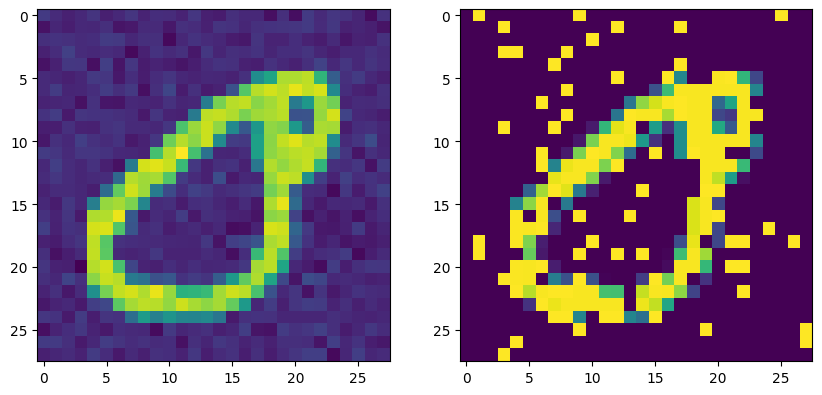

In [108]:
def guassian(image, mean, sigma):
  gaussian_noise = np.random.normal(mean, sigma, image.shape)
  new = image + gaussian_noise
  return new

def salt_pepper(image, saltprob, pepperprob):
  noisy_image = np.copy(image)
  row, col = noisy_image.shape
  salt_threshold = 1 - saltprob
  pepper_threshold = pepperprob

  salt_noise = np.random.random((row, col))
  noisy_image[salt_noise > salt_threshold] = 255
  pepper_noise = np.random.random((row, col))
  noisy_image[pepper_noise < pepper_threshold] = 0
  return noisy_image

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(guassian(image, 4, 12))
plt.subplot(1, 2, 2)
plt.imshow(salt_pepper(image, 0.1, 0.1))

morphological operations

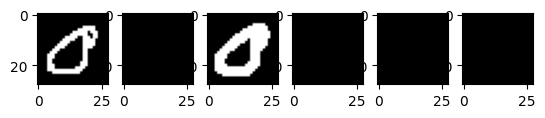

In [111]:
def erosion(image,mask):
    row, col = image.shape
    eroded=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    for i in range(row):
        for j in range(col):
            sub_array = padded_image[i:i + mask.shape[0], j:j + mask.shape[1]]
            eroded[i, j] = np.min(sub_array * mask)
    return eroded

def dilation(image, mask):
  row, col = image.shape
  row_pad = mask.shape[0]//2
  col_pad = mask.shape[1]//2
  dilated = np.zeros(image.shape)
  padded_img = np.pad(image, ((row_pad, row_pad), (col_pad, col_pad)))
  for i in range(row):
    for j in range(col):
      sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
      dilated[i, j] = np.max(sub_array * mask)
  return dilated

def opening(image,mask):
    return dilation(erosion(image,mask),mask)

def closing(image, mask):
  return erosion(dilation(image, mask), mask)

def hmt(image, b1, b2):
  image_c = np.where(image==0, 1, 0)
  hmt = np.bitwise_and(erosion(image, b1), erosion(image_c, b2))
  return hmt

figure, axis = plt.subplots(1,6)
binary_image = np.where(image>128, 1,0)
axis[0].imshow(binary_image, cmap='gray')

eroded_img = erosion(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[1].imshow(eroded_img, cmap='gray')

dilated_img = dilation(binary_image,  np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[2].imshow(dilated_img, cmap='gray')

close=closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[3].imshow(close, cmap='gray')

open = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[4].imshow(open, cmap='gray')

hmt = hmt(binary_image, np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))
axis[5].imshow(hmt, cmap='gray')

plt.show()

ideal guassian lp, hp

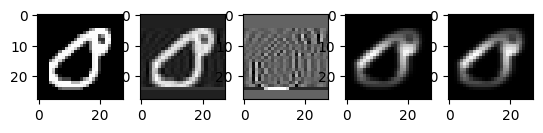

In [112]:
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image

def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=np.fft.ifft(s3).real
    s5=center_img(s4)
    return s5

def ideal_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = (math.sqrt(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) > t)
  s3 = s2*huv
  s4= np.fft.ifft(s3).real
  s5 = center_img(s4)
  return s5

def gauss_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
    s3=s2*huv
    s4=np.fft.ifft(s3)
    s5=np.array([elem.real for elem in np.fft.ifft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

def gauss_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = np.exp(-2*(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) / math.pow(t,2))
  s3 = s2*huv
  s4 = np.fft.ifft(s3).real
  s5= center_img(s4)
  return s5


g_lp_filter_img = gauss_lp_filter(image, 10)
ideal_lp_filter_img=ideal_lp_filter(image, 10)
g_hp_filter_img = gauss_hp_filter(image, 10)
ideal_hp_filter_img=ideal_hp_filter(image, 10)

figure, axis = plt.subplots(1,5)
axis[2].imshow(ideal_hp_filter_img, cmap='gray')
axis[4].imshow(g_hp_filter_img, cmap='gray')
axis[1].imshow(ideal_lp_filter_img, cmap='gray')
axis[3].imshow(g_lp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')


region growing merging splitting

In [ ]:
def region_growing(image, seed, threshold):
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    segmented_image = np.zeros_like(image)
    queue = [seed]
    while queue:
        current_point = queue.pop(0)
        x, y = current_point
        if not visited[x, y]:
            if abs(image[x, y] - np.mean(segmented_image)) < threshold:
                segmented_image[x, y] = 255
                visited[x, y] = True
                if x > 0:
                    queue.append((x - 1, y))
                if x < height - 1:
                    queue.append((x + 1, y))
                if y > 0:
                    queue.append((x, y - 1))
                if y < width - 1:
                    queue.append((x, y + 1))
    return segmented_image

def region_splitting(image, threshold):
    regions = []
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    def explore_region(start_point):
        region = []
        queue = [start_point]
        while queue:
            current_point = queue.pop(0)
            x, y = current_point
            if not visited[x, y]:
                visited[x, y] = True
                region.append(current_point)
                if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
                    queue.append((x - 1, y))
                if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
                    queue.append((x + 1, y))
                if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:
                    queue.append((x, y - 1))
                if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
                    queue.append((x, y + 1))
        return region
    for i in range(height):
        for j in range(width):
            if not visited[i, j]:
                region = explore_region((i, j))
                regions.append(region)
    return regions

def region_merging(regions, threshold):
    merged_regions = []
    for region in regions:
        mean_intensity = np.mean([train_images[pixel[0], pixel[1]] for pixel in region])
        for merged_region in merged_regions:
            if abs(mean_intensity - np.mean([train_images[pixel[0], pixel[1]] for pixel in merged_region])) < threshold:
                merged_region.extend(region)
                break
        else:
            merged_regions.append(region)
    return merged_regions

#yeh adhura h
cat_img = plt.imread("/content/download.jpeg")
grown_img=growing(greyscale(cat_img),20,(10,10))
fig, axis = plt.subplots(1,2)
axis[0].imshow(cat_img)
axis[1].imshow(grown_img, cmap='gray')
plt.show()

#yeh nahi smja
random_indices = np.random.randint(0, image.shape[0], size=15)

plt.figure(figsize=(20, 30))
for i, idx in enumerate(random_indices):
    random_image = image[idx]
    seed_point = (random_image.shape[0] // 2, random_image.shape[1] // 2)
    threshold_rg = 20
    segmented_image_rg = region_growing(random_image, seed_point, threshold_rg)
    threshold_rs = 20
    regions = region_splitting(random_image, threshold_rs)
    merged_regions = region_merging(regions, threshold_rs)
    plt.subplot(15, 4, i * 4 + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title('Original')

    plt.subplot(15, 4, i * 4 + 2)
    plt.imshow(segmented_image_rg, cmap='gray')
    plt.title('Region Growing')

    plt.subplot(15, 4, i * 4 + 3)
    plt.imshow(random_image, cmap='gray')
    for region in regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'r')
    plt.title('Region Splitting')

    plt.subplot(15, 4, i * 4 + 4)
    plt.imshow(random_image, cmap='gray')
    for region in merged_regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'g')
    plt.title('Region Merging')

plt.tight_layout()
plt.show()